<a href="https://colab.research.google.com/github/Tensor-Reloaded/PMP-2024/blob/main/Lab01/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimarea Înălțimii Medii a Studenților
Să presupunem că suntem interesați să estimăm înălțimea medie a studenților dintr-o universitate. Nu avem acces la datele întregii populații, dar putem măsura înălțimea unui eșantion aleatoriu de studenți. De asemenea, știm că înălțimile umane urmează aproximativ o distribuție normală.

Obiectivul nostru: Să estimăm înălțimea medie (mu) și variația în înălțimi (deviația standard sigma) a tuturor studenților, pe baza unui eșantion.

In [1]:
!python --version

Python 3.12.6


## Pasul 1: Simularea Datelor Observate
Pentru a simplifica, vom simula datele noastre observate. Să presupunem că:
- Înălțimea medie reală (true_mu): 170 cm
- Deviația standard reală (true_sigma): 10 cm

Vom genera un eșantion de 100 de studenți ale căror înălțimi le vom utiliza în model.

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Seed pentru reproducibilitate
np.random.seed(12)

# Parametrii reali
true_mu = 170       # Înălțimea medie reală în cm
true_sigma = 10     # Deviația standard reală în cm

# Generăm datele observate (înălțimile studenților)
observed_heights = np.random.normal(true_mu, true_sigma, size=100)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Pasul 2: Vizualizarea Datelor
Înainte de a construi modelul, este util să vizualizăm datele.

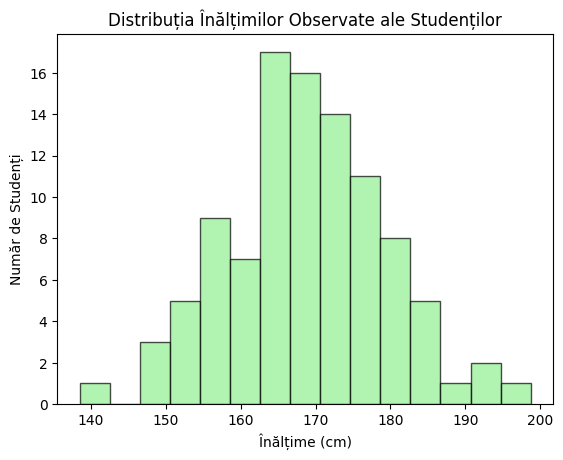

In [3]:
# Afișăm un histogram al înălțimilor observate
plt.hist(observed_heights, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribuția Înălțimilor Observate ale Studenților')
plt.xlabel('Înălțime (cm)')
plt.ylabel('Număr de Studenți')
plt.show()

## Pasul 3: Definirea Modelului Probabilistic
Utilizăm PyMC pentru a defini un model probabilistic care să ne permită să estimăm mu și sigma pe baza datelor observate.

In [4]:
# Definim modelul probabilistic
with pm.Model() as model:
    # Prior pentru înălțimea medie (mu)
    mu = pm.Normal('mu', mu=160, sigma=15)  # Presupunem inițial că media ar putea fi în jur de 160 cm

    # Prior pentru deviația standard (sigma)
    sigma = pm.HalfNormal('sigma', sigma=10)  # Deviația standard trebuie să fie pozitivă

    # Verosimilitatea datelor observate
    heights = pm.Normal('heights', mu=mu, sigma=sigma, observed=observed_heights)

    # Efectuăm eșantionarea MCMC
    print("Începem eșantionarea MCMC...")
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)
    print("Eșantionarea MCMC s-a încheiat.")


Începem eșantionarea MCMC...


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(160)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_19e7dp4z


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float32}(10)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_gtzy_t6m


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(160)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_zsdbriy6


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(10)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_32svjek8


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(160)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_ky4r4ipa


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(10)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_egkl5buh


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(160)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_91ttm33u


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(10)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1909, in process_node
    replacements = node_rewriter.transform(fgraph, node)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\graph\rewriting\basic.py", line 1081, in transform
    return self.fn(fgraph, node)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1122, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
            ^^^^^^^^^^^^^^^^^^^^^^^


You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_6kn94g_1

You can find the C code in this temporary file: C:\Users\Eliza\AppData\Local\Temp\pytensor_compilation_error_47nmi2hx


CompileError: Compilation failed (return status=1):
"C:\MinGW\bin\g++.exe" -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -DMS_WIN64 -I"c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\include" -I"c:\Users\Eliza\AppData\Local\Programs\Python\Python312\include" -I"c:\Users\Eliza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\link\c\c_code" -L"c:\Users\Eliza\AppData\Local\Programs\Python\Python312\libs" -L"c:\Users\Eliza\AppData\Local\Programs\Python\Python312" -o "C:\Users\Eliza\AppData\Local\PyTensor\compiledir_Windows-11-10.0.22631-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.12.6-64\lazylinker_ext\lazylinker_ext.pyd" "C:\Users\Eliza\AppData\Local\PyTensor\compiledir_Windows-11-10.0.22631-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.12.6-64\lazylinker_ext\mod.cpp" "c:\Users\Eliza\AppData\Local\Programs\Python\Python312\python312.dll"
C:\Users\Eliza\AppData\Local\PyTensor\compiledir_Windows-11-10.0.22631-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.12.6-64\lazylinker_ext\mod.cpp:1:0: sorry, unimplemented: 64-bit mode not compiled in
 #include "pytensor_mod_helper.h"
 


### Explicații:
Am creat un model pe baza urmatoarelor presupuneri:
- Prior pentru mu: Presupunem inițial că înălțimea medie este în jur de 160 cm, cu o incertitudine de 15 cm.
- Prior pentru sigma: Folosim o distribuție HalfNormal deoarece deviația standard nu poate fi negativă.
- Verosimilitatea: Modelăm înălțimile observate ca provenind dintr-o distribuție normală cu parametrii necunoscuți mu și sigma.

## Pasul 4: Analiza Rezultatelor
Rezumatul Posterior

In [ ]:
# Rezumatul parametrilor posteriori
print("\nRezumatul estimărilor:")
summary = az.summary(trace, var_names=['mu', 'sigma'])
print(summary)

### Interpretare:

- mu: Valoarea estimată pentru înălțimea medie a studenților.
- sigma: Estimarea variației în înălțimi.


## Distribuțiile Posterioare

In [ ]:
# Afișăm distribuțiile posterioare
print("\nPlotăm distribuțiile posterioare pentru 'mu' și 'sigma'...")
az.plot_posterior(trace, var_names=['mu', 'sigma'], hdi_prob=0.95)
plt.show()

### Interpretare:
Graficul arată distribuțiile probabilistice actualizate ale parametrilor după ce am luat în considerare datele observate.
- Pentru mu: Vedem unde este cel mai probabil să se afle înălțimea medie și cât de siguri suntem de această estimare.
- Pentru sigma: Similar, vedem estimarea pentru deviația standard.

## Traseele MCMC

In [ ]:
# Plotăm traseele MCMC
print("Plotăm traseele MCMC pentru 'mu' și 'sigma'...")
az.plot_trace(trace, var_names=['mu', 'sigma'])
plt.show()

### Interpretare:

Traseele arată cum valorile estimate pentru mu și sigma au evoluat pe parcursul eșantionării.
Un traseu stabil și bine amestecat indică o eșantionare eficientă și convergența către distribuția posterioară corectă.

## Compararea Valorilor Estimate cu Cele Reale

In [ ]:
# Comparam valorile estimate cu valorile reale
estimated_mu = summary.loc['mu', 'mean']
estimated_sigma = summary.loc['sigma', 'mean']
print(f"\nValoarea reală a 'mu' (înălțimea medie reală): {true_mu} cm")
print(f"Valoarea estimată a 'mu': {estimated_mu:.2f} cm")
print(f"Valoarea reală a 'sigma' (deviația standard reală): {true_sigma} cm")
print(f"Valoarea estimată a 'sigma': {estimated_sigma:.2f} cm")

### Interpretare:

Observăm cât de aproape sunt estimările noastre de valorile reale folosite pentru a genera datele.
Diferențe mici indică faptul că modelul nostru a funcționat bine.